In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
# Using more base model
# Review split dataset
# params for model+feature selection
# overfit

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training7.csv")
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,0,0,0,0,0,1,0,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,0,0,0,0,0,1,0,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,0,0,0,0,0,1,0,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1,0,1,0,0,0,0,0,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,0,0,0,0,0,1,0,0,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.084284,0.334901,0.263843,0.790982,-0.077856,0.522897,0.507101,0.475241,0.386420,-0.011378,...,-0.242598,NaN,-0.118069,-0.050686,-0.015525,-0.046480,-0.153990,0.352060,NaN,1.000000
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,-0.225013,NaN,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295,NaN,0.790982
GrLivArea,0.074853,0.368392,0.263116,0.593007,-0.079686,0.199010,0.287389,0.389893,0.208171,-0.009640,...,-0.121102,NaN,-0.041173,-0.040208,0.032283,-0.007743,-0.091572,0.163239,NaN,0.708624
GarageCars,-0.040110,0.269729,0.154871,0.600671,-0.185758,0.537850,0.420622,0.363778,0.224054,-0.038264,...,-0.197458,NaN,-0.110124,-0.106443,0.028378,-0.010589,-0.121886,0.282164,NaN,0.640409
GarageArea,-0.098672,0.323663,0.180403,0.562022,-0.151521,0.478954,0.371600,0.372567,0.296970,-0.018227,...,-0.218665,NaN,-0.096837,-0.101277,-0.005458,-0.016173,-0.130874,0.294714,NaN,0.623431
TotalBsmtSF,-0.238518,0.363358,0.260833,0.537808,-0.171098,0.391452,0.291066,0.362452,0.522396,0.104810,...,-0.212851,NaN,-0.032031,-0.055895,-0.047002,0.019569,-0.160222,0.266268,NaN,0.613581
1stFlrSF,-0.251758,0.414266,0.299475,0.476224,-0.144203,0.281986,0.240379,0.342160,0.445863,0.097117,...,-0.198056,NaN,-0.030196,-0.037451,0.068107,0.021949,-0.158772,0.221037,NaN,0.605852
FullBath,0.131608,0.180424,0.126031,0.550600,-0.194149,0.468271,0.439046,0.275730,0.058543,-0.076444,...,-0.161352,NaN,-0.093473,-0.006193,0.016794,-0.003225,-0.110040,0.232767,NaN,0.560664
BsmtQual_Ex,-0.055495,0.210258,0.065639,0.470780,-0.151008,0.319394,0.286165,0.333908,0.271434,-0.042850,...,-0.286102,NaN,-0.052580,-0.015756,-0.027366,-0.035427,-0.221979,0.378613,NaN,0.553105
TotRmsAbvGrd,0.040380,0.320146,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280027,0.044316,-0.035227,...,-0.113335,NaN,-0.050332,-0.008639,0.059698,0.031347,-0.092644,0.142032,NaN,0.533723


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('svr', SVR(kernel='rbf'))
]
meta_model = GradientBoostingRegressor()
model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,20740.115073,32074.175906,0.865879
1,11,19308.312226,29937.779532,0.883151
2,12,19815.768299,31304.259198,0.872241
3,13,19594.978495,31354.039634,0.871834
4,14,19645.463956,30283.303317,0.880438
...,...,...,...,...
105,115,17203.358005,39560.516411,0.795962
106,116,16794.656100,35596.180894,0.834806
107,117,17829.870101,34929.726565,0.840934
108,118,18128.325443,38894.085220,0.802779


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
106,116,16794.656100,35596.180894,0.834806
47,57,17078.936190,28530.995974,0.893874
100,110,17091.692019,34740.983662,0.842649
89,99,17157.658594,29997.894028,0.882681
105,115,17203.358005,39560.516411,0.795962
...,...,...,...,...
11,21,20084.076011,32689.427967,0.860684
12,22,20186.998483,33426.390364,0.854332
10,20,20270.260914,32862.402142,0.859206
0,10,20740.115073,32074.175906,0.865879


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19268\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19268\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


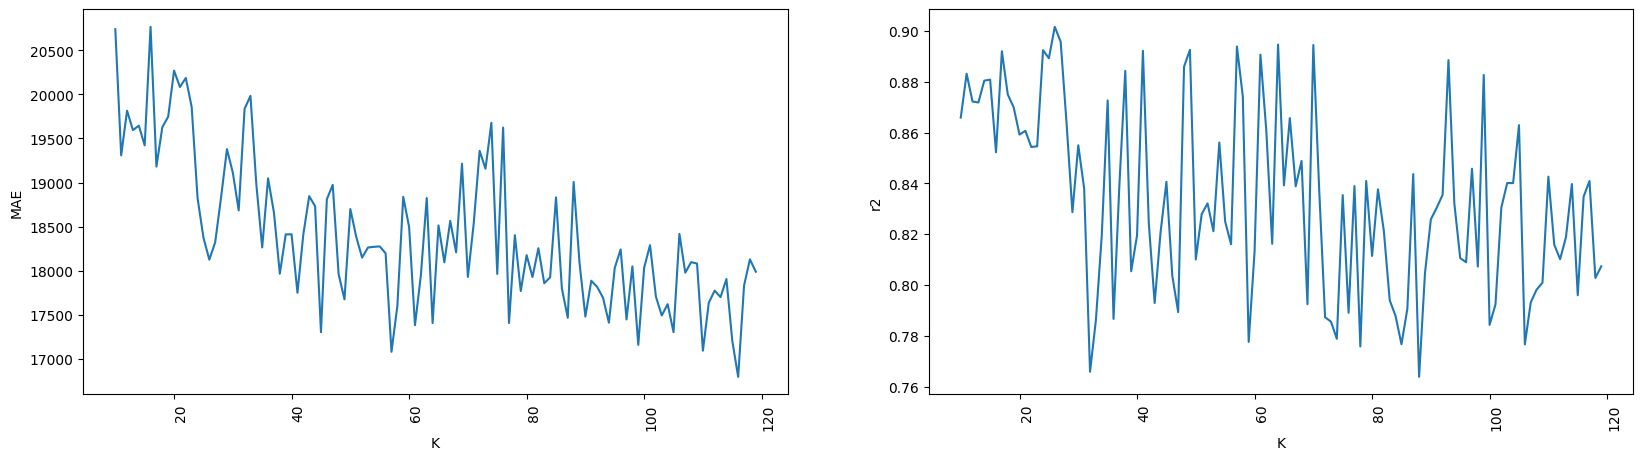

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               1.788113e+03
LotFrontage              4.847253e+02
LotArea                  9.955741e+07
OverallQual              1.911369e+00
OverallCond              1.237474e+00
                             ...     
SaleCondition_Family     1.351098e-02
SaleCondition_Normal     1.472490e-01
SaleCondition_Partial    7.828626e-02
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Ageofhouse',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'Condition1_Norm', 'BldgType_1Fam', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng'

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Ageofhouse',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'Condition1_Norm', 'BldgType_1Fam', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng'

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,17614.626484,36586.879372,0.825483
1,101,17678.949564,37541.265696,0.816260
2,102,17623.723793,37367.091707,0.817961
3,103,17662.629152,37261.691563,0.818986
4,104,17628.648262,37232.847643,0.819266
...,...,...,...,...
395,495,17559.729738,31596.421272,0.869845
396,496,17484.217010,31327.288445,0.872053
397,497,17571.999855,31449.361678,0.871053
398,498,17461.696666,31088.486873,0.873996


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
149,249,16603.054004,28316.093346,0.895467
152,252,16729.478965,29548.932685,0.886167
118,218,16731.892826,29261.152836,0.888373
163,263,16775.990603,29989.547123,0.882746
110,210,16801.587791,30414.211694,0.879402
...,...,...,...,...
73,173,18720.678720,43290.911109,0.755668
75,175,18727.465855,43371.382108,0.754759
90,190,18729.277472,43101.670861,0.757800
53,153,18731.486696,43308.595599,0.755469


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19268\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19268\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


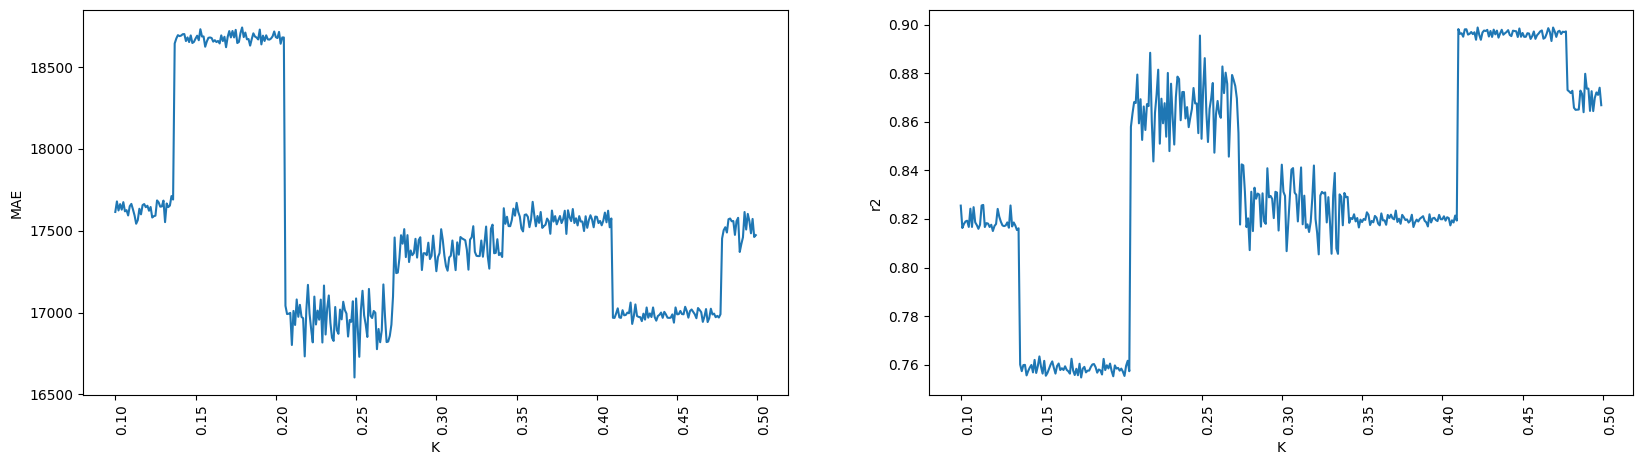

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


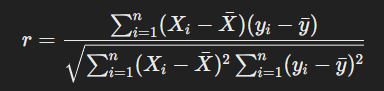

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.7909816005838051


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19268\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[['OverallQual', 0.7909816005838051],
 ['TotalBsmtSF', 0.6135805515591953],
 ['1stFlrSF', 0.6058521846919146],
 ['GrLivArea', 0.708624477612652],
 ['GarageCars', 0.640409197258352],
 ['GarageArea', 0.6234314389183616]]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,20763.700652,30468.221806,0.878974
1,6,20770.547567,31009.779333,0.874633
2,7,20545.804771,29740.796659,0.884684
3,8,21267.741281,32558.397992,0.861799
4,9,20830.545690,32694.320945,0.860642
...,...,...,...,...
110,115,17565.827533,35996.016497,0.831075
111,116,17943.650653,40518.584605,0.785960
112,117,17084.594740,37439.710609,0.817253
113,118,17174.039476,28896.333786,0.891139


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
112,117,17084.594740,37439.710609,0.817253
47,52,17103.004710,28283.205358,0.895710
113,118,17174.039476,28896.333786,0.891139
19,24,17185.400927,25439.069641,0.915630
89,94,17223.866848,30077.391887,0.882059
...,...,...,...,...
2,7,20545.804771,29740.796659,0.884684
0,5,20763.700652,30468.221806,0.878974
1,6,20770.547567,31009.779333,0.874633
4,9,20830.545690,32694.320945,0.860642


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19268\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19268\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


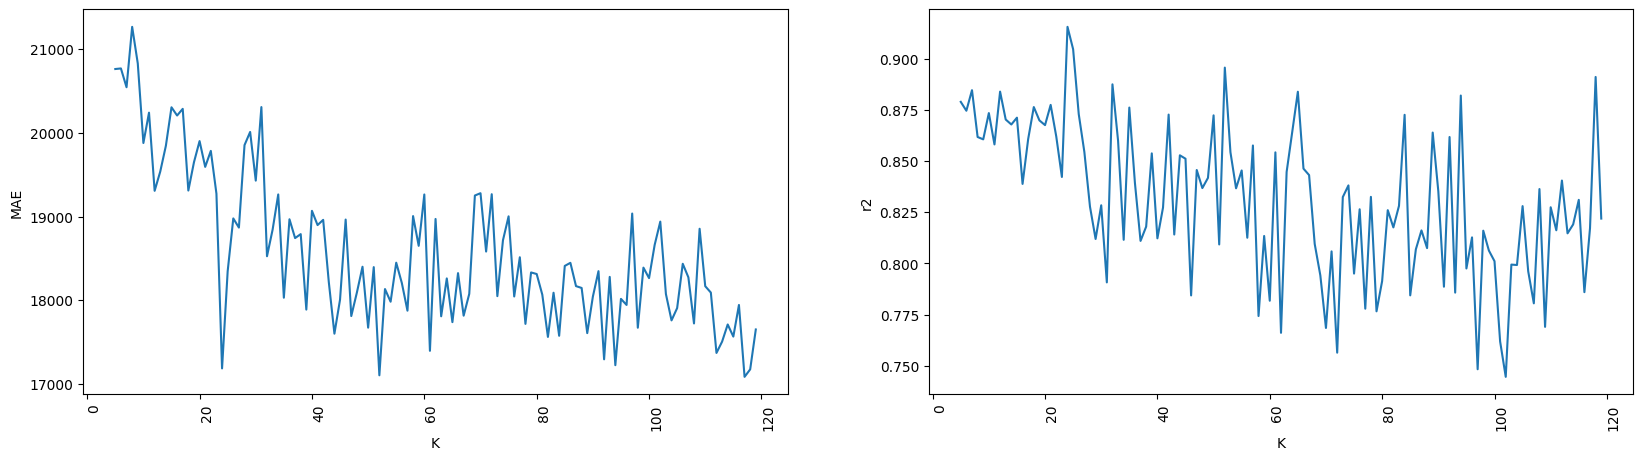

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

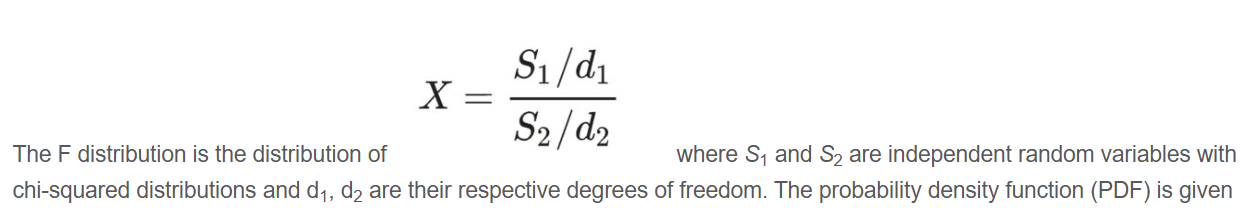

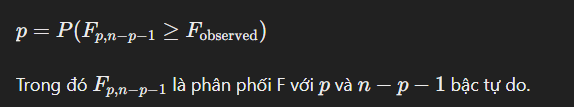

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,20741.426256,30394.768252,0.879556
1,6,20780.992507,30993.746893,0.874763
2,7,21166.390800,31752.974876,0.868552
3,8,20956.132454,32762.658138,0.860059
4,9,20831.436105,31599.847994,0.869816
...,...,...,...,...
110,115,18334.718750,35155.756818,0.838869
111,116,16986.610442,28637.907720,0.893078
112,117,17857.112788,32615.501984,0.861313
113,118,18369.404806,38053.954357,0.811207


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
103,108,16718.945290,31019.181617,0.874557
102,107,16817.257966,31016.400546,0.874579
105,110,16850.128617,31136.117787,0.873609
86,91,16905.663414,29159.493211,0.889147
80,85,16930.942296,31194.498323,0.873135
...,...,...,...,...
4,9,20831.436105,31599.847994,0.869816
17,22,20903.602605,42844.044880,0.760687
3,8,20956.132454,32762.658138,0.860059
2,7,21166.390800,31752.974876,0.868552


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19268\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19268\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


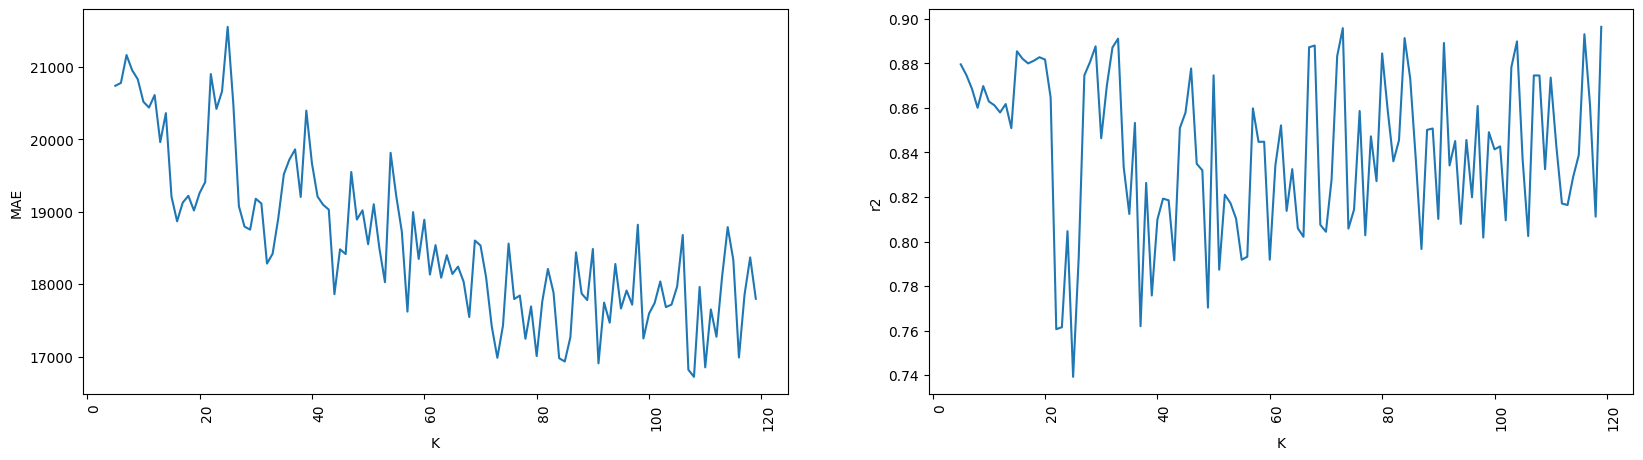

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

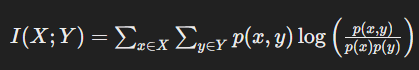

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

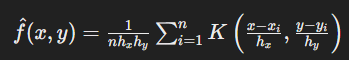

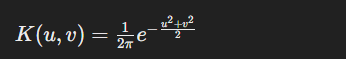

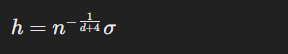

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,19216.588308,29873.248607,0.883654
1,6,19700.029338,28845.371478,0.891523
2,7,19291.526390,30413.261749,0.879410
3,8,20212.287071,30923.494104,0.875330
4,9,20096.838529,32142.151848,0.865310
...,...,...,...,...
110,115,17682.039830,36515.438714,0.826164
111,116,18215.312351,36091.110492,0.830181
112,117,16956.955606,30603.679201,0.877895
113,118,17822.267770,35634.096808,0.834454


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
100,105,16207.217524,26075.631646,0.911355
46,51,16397.496637,24177.381468,0.923791
103,108,16616.420870,32715.816868,0.860459
53,58,16634.768317,25521.848545,0.915080
50,55,16722.259603,24490.922498,0.921802
...,...,...,...,...
4,9,20096.838529,32142.151848,0.865310
3,8,20212.287071,30923.494104,0.875330
17,22,20638.133561,41685.320712,0.773456
15,20,20695.512848,41624.017423,0.774122


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19268\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19268\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


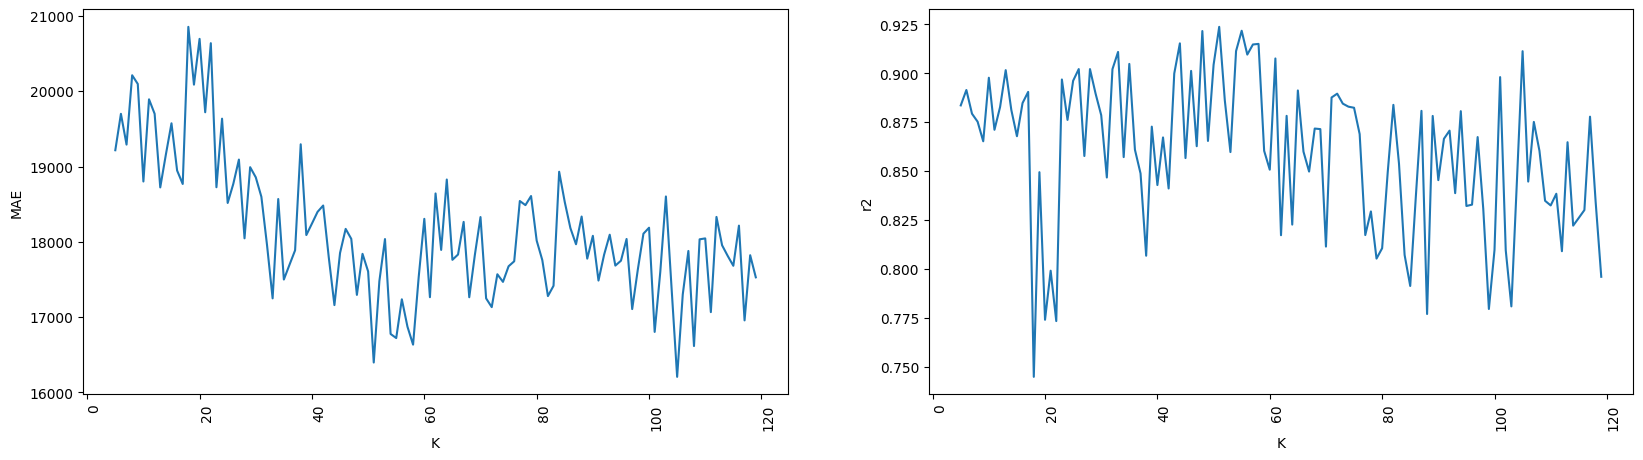

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,20763.700652,30468.221806,0.878974
1,6,20770.547567,31009.779333,0.874633
2,7,20545.804771,29740.796659,0.884684
3,8,21267.741281,32558.397992,0.861799
4,9,20830.545690,32694.320945,0.860642
...,...,...,...,...
110,115,17565.827533,35996.016497,0.831075
111,116,17943.650653,40518.584605,0.785960
112,117,17084.594740,37439.710609,0.817253
113,118,17174.039476,28896.333786,0.891139


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,20741.426256,30394.768252,0.879556
1,6,20780.992507,30993.746893,0.874763
2,7,21166.390800,31752.974876,0.868552
3,8,20956.132454,32762.658138,0.860059
4,9,20831.436105,31599.847994,0.869816
...,...,...,...,...
110,115,18334.718750,35155.756818,0.838869
111,116,16986.610442,28637.907720,0.893078
112,117,17857.112788,32615.501984,0.861313
113,118,18369.404806,38053.954357,0.811207


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,19216.588308,29873.248607,0.883654
1,6,19700.029338,28845.371478,0.891523
2,7,19291.526390,30413.261749,0.879410
3,8,20212.287071,30923.494104,0.875330
4,9,20096.838529,32142.151848,0.865310
...,...,...,...,...
110,115,17682.039830,36515.438714,0.826164
111,116,18215.312351,36091.110492,0.830181
112,117,16956.955606,30603.679201,0.877895
113,118,17822.267770,35634.096808,0.834454


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,20763.700652,30468.221806,0.878974,20741.426256,30394.768252,0.879556
1,6,20770.547567,31009.779333,0.874633,20780.992507,30993.746893,0.874763
2,7,20545.804771,29740.796659,0.884684,21166.390800,31752.974876,0.868552
3,8,21267.741281,32558.397992,0.861799,20956.132454,32762.658138,0.860059
4,9,20830.545690,32694.320945,0.860642,20831.436105,31599.847994,0.869816
...,...,...,...,...,...,...,...
110,115,17565.827533,35996.016497,0.831075,18334.718750,35155.756818,0.838869
111,116,17943.650653,40518.584605,0.785960,16986.610442,28637.907720,0.893078
112,117,17084.594740,37439.710609,0.817253,17857.112788,32615.501984,0.861313
113,118,17174.039476,28896.333786,0.891139,18369.404806,38053.954357,0.811207


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,20763.700652,30468.221806,0.878974,20741.426256,30394.768252,0.879556,19216.588308,29873.248607,0.883654
1,6,20770.547567,31009.779333,0.874633,20780.992507,30993.746893,0.874763,19700.029338,28845.371478,0.891523
2,7,20545.804771,29740.796659,0.884684,21166.390800,31752.974876,0.868552,19291.526390,30413.261749,0.879410
3,8,21267.741281,32558.397992,0.861799,20956.132454,32762.658138,0.860059,20212.287071,30923.494104,0.875330
4,9,20830.545690,32694.320945,0.860642,20831.436105,31599.847994,0.869816,20096.838529,32142.151848,0.865310
...,...,...,...,...,...,...,...,...,...,...
110,115,17565.827533,35996.016497,0.831075,18334.718750,35155.756818,0.838869,17682.039830,36515.438714,0.826164
111,116,17943.650653,40518.584605,0.785960,16986.610442,28637.907720,0.893078,18215.312351,36091.110492,0.830181
112,117,17084.594740,37439.710609,0.817253,17857.112788,32615.501984,0.861313,16956.955606,30603.679201,0.877895
113,118,17174.039476,28896.333786,0.891139,18369.404806,38053.954357,0.811207,17822.267770,35634.096808,0.834454


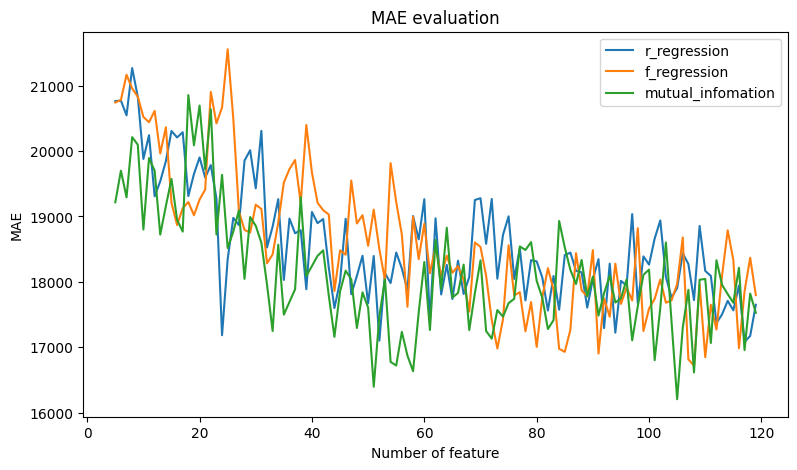

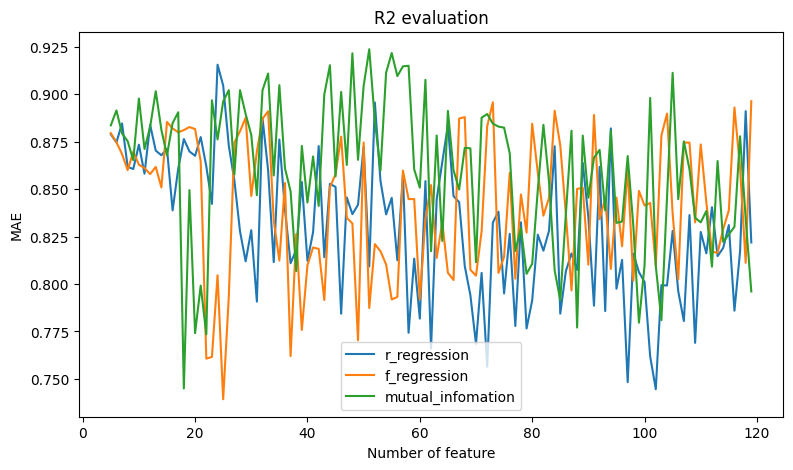

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()